#  <p><HR></p>

# <p><b><center></br>Probleme de positionnement Des 8 Reines Sous contraintes</center></b></p>

# <p><HR NOSHADE></p>

# <center>Fonction Objective </center>

<p>L'idee est d'augmenter le score a condition que toutes les conditions de positionnement soient respecter.
Vu que nous parcourons deux fois le vecteur X des positions des reines dans chaque colonne,nous aurons a diviser le score par 2 car chaque comparaison sera repeter deux fois.
Exemple:X=[2,4,6,0,9]

In [27]:
def Score_gained_test(X):
    score = 0
    for colonne in range(len(X)):
        ligne = X[colonne]
        for autre_colonne in range(len(X)):
            if autre_colonne == colonne: #si en parcourant la 2eme fois X,on tombe sur le meme indice,il s'agit du meme element,inutile de faire une action
                continue
            if X[autre_colonne] == ligne:#si 2 reines se retrouvent sur la meme ligne
                print("Les reines aux positions ({},{}) et ({},{}) sont sur la meme ligne".format(ligne,colonne,X[autre_colonne],autre_colonne))
                continue
            if autre_colonne + X[autre_colonne] == colonne+ligne:
                print("Les reines aux positions ({},{}) et ({},{}) sont sur la meme premiere diagonale".format(ligne,colonne,X[autre_colonne],autre_colonne))
                continue

            if autre_colonne - X[autre_colonne] == colonne-ligne:
                print("Les reines aux positions ({},{}) et ({},{}) sont sur la meme deuxieme diagonale".format(ligne,colonne,X[autre_colonne],autre_colonne))
                continue
                
                
            #On incrémente le score de 1 dans la boucle si la reine respecte toutes les conditions
            score += 1
    
    #Diviser le score par 2 à cause la comutativité
    return score/2

In [28]:
X=[1,2,3,4,5,6,7,8]
Score_gained_test(X)

Les reines aux positions (1,0) et (2,1) sont sur la meme deuxieme diagonale
Les reines aux positions (1,0) et (3,2) sont sur la meme deuxieme diagonale
Les reines aux positions (1,0) et (4,3) sont sur la meme deuxieme diagonale
Les reines aux positions (1,0) et (5,4) sont sur la meme deuxieme diagonale
Les reines aux positions (1,0) et (6,5) sont sur la meme deuxieme diagonale
Les reines aux positions (1,0) et (7,6) sont sur la meme deuxieme diagonale
Les reines aux positions (1,0) et (8,7) sont sur la meme deuxieme diagonale
Les reines aux positions (2,1) et (1,0) sont sur la meme deuxieme diagonale
Les reines aux positions (2,1) et (3,2) sont sur la meme deuxieme diagonale
Les reines aux positions (2,1) et (4,3) sont sur la meme deuxieme diagonale
Les reines aux positions (2,1) et (5,4) sont sur la meme deuxieme diagonale
Les reines aux positions (2,1) et (6,5) sont sur la meme deuxieme diagonale
Les reines aux positions (2,1) et (7,6) sont sur la meme deuxieme diagonale
Les reines a

0.0

In [29]:
X=[0,5,1,4,6,3,2,2]
Score_gained_test(X)

Les reines aux positions (3,5) et (2,6) sont sur la meme premiere diagonale
Les reines aux positions (2,6) et (3,5) sont sur la meme premiere diagonale
Les reines aux positions (2,6) et (2,7) sont sur la meme ligne
Les reines aux positions (2,7) et (2,6) sont sur la meme ligne


26.0

In [30]:
X=[6,1,3,5,7,2,4,6]
Score_gained_test(X)

Les reines aux positions (6,0) et (6,7) sont sur la meme ligne
Les reines aux positions (6,7) et (6,0) sont sur la meme ligne


27.0

In [31]:
X=[0,1,3,5,7,2,4,6]
Score_gained_test(X)

Les reines aux positions (0,0) et (1,1) sont sur la meme deuxieme diagonale
Les reines aux positions (1,1) et (0,0) sont sur la meme deuxieme diagonale


27.0

<b><u>Interprétation:</u>L'ideale serait de trouver une solution qui respecte toutes les conditions.Ce qui serait difficile
mais,trouver deja celle qui offre le meilleur score est un bon objectif</b>

In [32]:
def Score_gained(X):
    score = 0
    for colonne in range(len(X)):
        ligne = X[colonne]
        for autre_colonne in range(len(X)):
            if autre_colonne == colonne: 
                continue
            if X[autre_colonne] == ligne:
                continue
            if autre_colonne + X[autre_colonne] == colonne+ligne:
                continue
            if autre_colonne - X[autre_colonne] == colonne-ligne:
                continue
            score += 1
    return score/2

# <center>Fonction rand_population </center>

In [37]:
import math as m
import numpy as np
def rand_population(population_size=10):
    x=[]
    for i in range(population_size):
            x.append(np.random.choice(8,8))
    return x

# <center>Fonction Select</center>

In [38]:
#n_parents:nombre de parents voulu
#population_indices:taille de la population dans laquelle les parents seront choisis
#np.random.randint(population_indices,size=(n_parents,2)):generer de maniere aleatoire un indice de population tel que la taille de la matrice finale sera (nbre de ligne=n_parents,nombre de colonne=2 soit 1 pere et une mere)
def select(n_parents=5,population_size=10):
    parents=[]
    parents.append(np.random.randint(population_size,size=(n_parents,2)))
    return parents

# <center>Fonction Crossover </center>

In [39]:
def crossover(parent_a,parent_b):
    enfant=[]
    for i in range(8):#parcourir les parents
            u=np.random.randint(2)
            if u==0 :
                enfant.append(parent_a[i]) 
            else:
                enfant.append(parent_b[i])
    return enfant

# <center>Fonction Mutation</center>

<P>L'idee ici est de realiser une mutation ponctuelle.Modifier la position d'une reine de maniere aleatoire par une position aleatoire 

In [40]:
def mutation(gene):
    pm=0.125
    for i in range(8):
        u=np.random.rand()
        if u<pm :
            gene[i]=np.random.randint(0,8)
            break
    return gene         

# <center>Fonction calcul_fitness</center>

In [41]:
def calcul_fitness(population_muter):
    fitness=[]
    for i in population_muter:
        fitness.append(Score_gained(i))
    return fitness

# <center>Fonction survival</center>

In [44]:
def survival(fitness=[],n_survivors=5,population_muter=[]):
    indices_des_individus_croissant=np.argsort(fitness).tolist()
    taille_indices_des_individus_croissant=len(indices_des_individus_croissant)-1 #commencer par le dernier indice
    
    indices_des_individus_decroissant=[]
    seuil=len(indices_des_individus_croissant)-n_survivors
    while taille_indices_des_individus_croissant>=seuil:
        indices_des_individus_decroissant.append(indices_des_individus_croissant[taille_indices_des_individus_croissant])
        taille_indices_des_individus_croissant=taille_indices_des_individus_croissant-1
       
    fitness.sort(reverse=True)
    survivors_fitness=fitness[:n_survivors]
    
    individus_de_chaque_fitness=[]
    for i in indices_des_individus_decroissant:
            individus_de_chaque_fitness.append(population_muter[i])
    return (individus_de_chaque_fitness,survivors_fitness)

# <center>Fonction eliminate_duplicates</center>

In [45]:
from scipy.spatial.distance import cdist
def eliminate_duplicates(X):
    D = cdist(X, X)
    D[np.triu_indices(len(X))] = np.inf
    return np.all(D > 1e-32, axis=1)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# <center><b>MAIN<b><center>

In [46]:
def main(nbre_generation=1):
    generations=[]
    population=rand_population()
    for g in range(nbre_generation):
        
        parents_selectionner=select(population_size=len(population))
                        #la population issue du croisement des parents selectionner
        population_fille_generer=[]
        for i in parents_selectionner[0].tolist():
            population_fille_generer.append(crossover(population[i[0]],population[i[1]]))


                        #concatenation des deux populations filles et initiales
        population_initiale_and_fille=np.concatenate((np.array(population),np.array(population_fille_generer)),axis=0)


                        #application de la mutation sur la population merged
        population_muter=[]
        for j in population_initiale_and_fille:
            population_muter.append(mutation(j))


    

                       #recherche de l'individu avec la plus grande fitness et de l'individu avec la plus petite fitness 
        fitness=calcul_fitness(population_muter)
        moyenne_fitness=np.mean(fitness)
        max_fitness=max(fitness)
        min_fitness=min(fitness)
        individu_with_max_fitness=population_muter[fitness.index(max_fitness)]
        individu_with_min_fitness=population_muter[fitness.index(min_fitness)]

                        #calcul des survivals
        resultat=survival(fitness=fitness,population_muter=population_muter)

                        #supression des doublons
        doublons_mask=eliminate_duplicates(resultat[0])
        r=np.array(resultat[0])
        population_resultat=r[doublons_mask]  
        generations.append(["generation numero "+str(g),population_muter,individu_with_max_fitness,max_fitness,individu_with_min_fitness,min_fitness,moyenne_fitness,fitness])  
        population=population_resultat
    return generations

# <center><b>Generations<b><center>

In [48]:
n=int(input("Veuillez entrer le nombre de generation desirer "))
generations=main(n)

Veuillez entrer le nombre de generation desirer 5


In [53]:
generations

[['generation numero 0',
  [array([6, 5, 0, 1, 4, 1, 3, 5]),
   array([6, 5, 5, 5, 5, 3, 1, 6]),
   array([2, 4, 3, 1, 4, 5, 2, 5]),
   array([4, 7, 4, 5, 7, 2, 7, 0]),
   array([3, 6, 5, 6, 4, 3, 3, 1]),
   array([3, 3, 7, 7, 7, 5, 6, 1]),
   array([0, 3, 6, 2, 7, 7, 0, 3]),
   array([6, 5, 0, 5, 5, 1, 5, 2]),
   array([5, 0, 6, 4, 3, 0, 3, 7]),
   array([2, 0, 0, 5, 7, 3, 3, 1]),
   array([2, 0, 0, 7, 7, 3, 2, 1]),
   array([3, 5, 5, 7, 5, 3, 7, 1]),
   array([6, 5, 5, 7, 5, 1, 5, 6]),
   array([2, 0, 6, 3, 7, 3, 0, 3]),
   array([0, 0, 6, 5, 7, 3, 1, 3])],
  array([0, 3, 6, 2, 7, 7, 0, 3]),
  24.0,
  array([3, 6, 5, 6, 4, 3, 3, 1]),
  16.0,
  20.133333333333333,
  [24.0,
   23.0,
   23.0,
   22.0,
   21.0,
   21.0,
   21.0,
   20.0,
   20.0,
   20.0,
   19.0,
   18.0,
   18.0,
   16.0,
   16.0]],
 ['generation numero 1',
  [array([0, 3, 6, 2, 7, 7, 0, 3]),
   array([2, 0, 6, 5, 7, 3, 1, 3]),
   array([5, 4, 6, 4, 3, 0, 3, 7]),
   array([2, 0, 6, 3, 7, 3, 0, 3]),
   array([3, 3, 7, 7

# <center><b>Graphiques<b><center>

<p>L'idee d'affichage d'une disposition des 8 reines est d'utiliser une grille et de recuperer la variable <b>generations<b> ou:<br> generations[i]=la ieme generation,<br>generations[i][1]=la liste des individus de la poulation,<br>generations[i][1][j]=le jeme individu de la population

In [82]:
def affichage_position_des_reinnes(x,num_generation,num_population):
    lignes=[]
    colonnes=[]
    for i in range(8):
        lignes.append(x[i])
        colonnes.append(i)
    plt.figure(figsize=(9,8))
    plt.scatter(lignes ,colonnes,s=8, label="Les dispositions des reines",c="RED")
    plt.grid(visible=True)
    plt.title("generation "+str(num_generation+1)+"population "+str(num_population+1))
    plt.legend()
    plt.show()   

<b><i>Un exemple<i><b/>

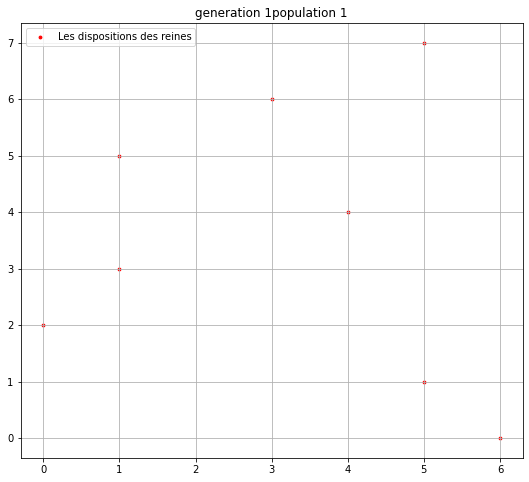

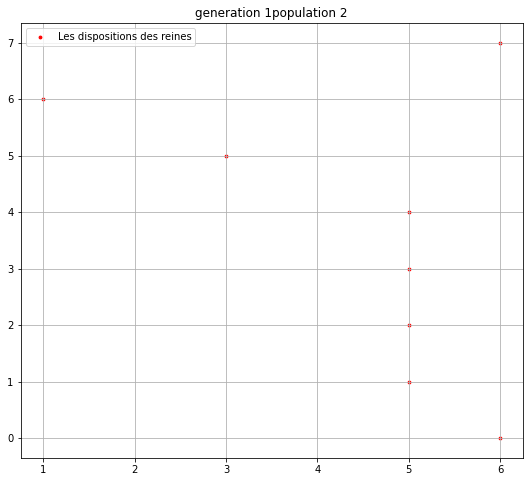

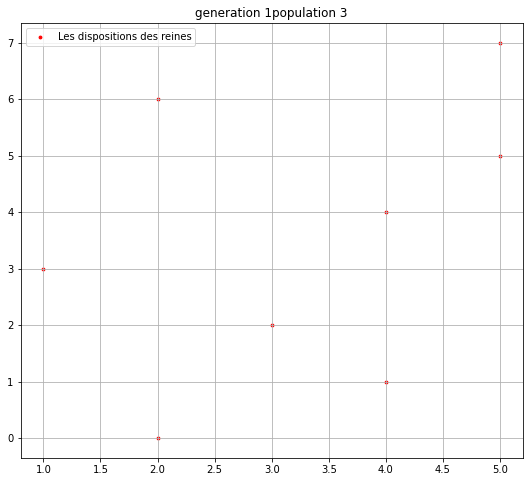

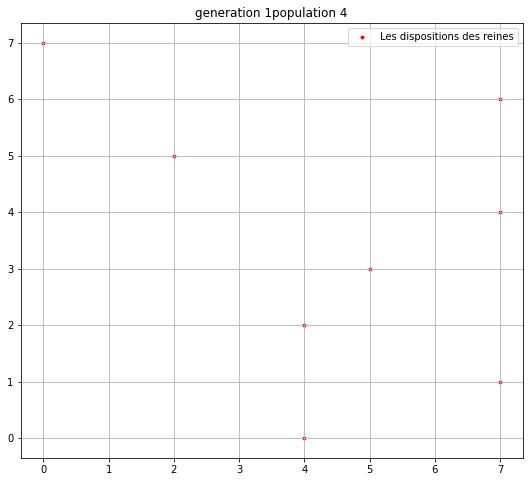

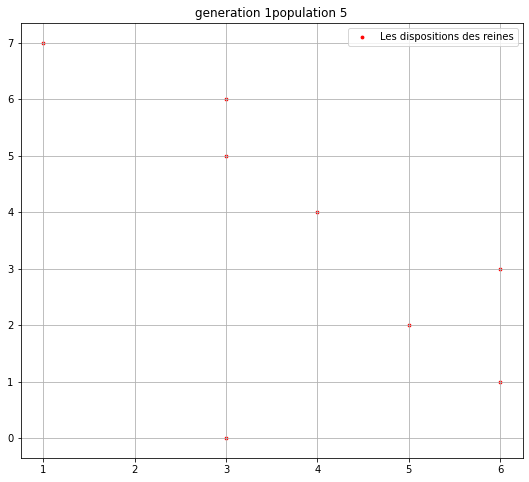

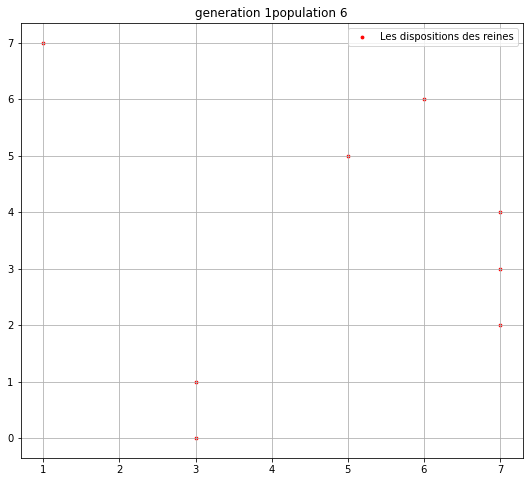

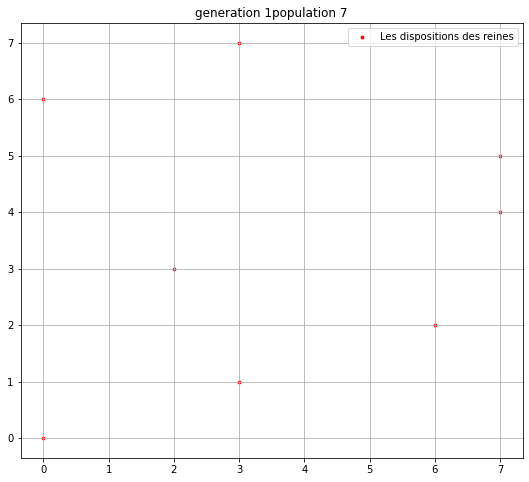

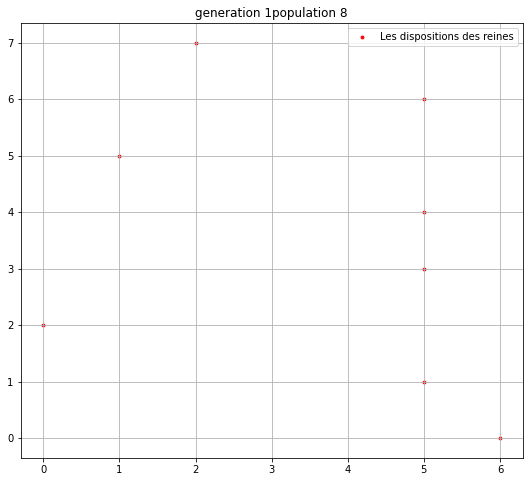

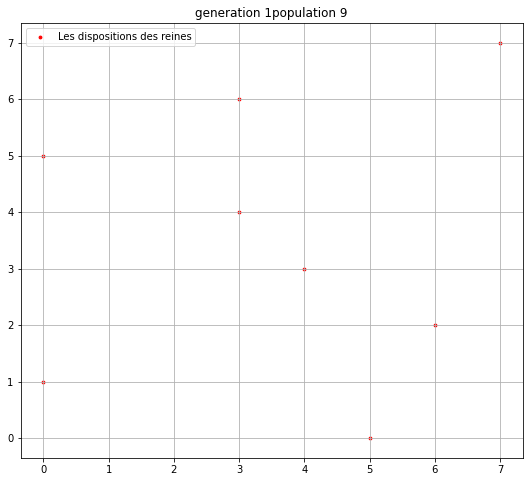

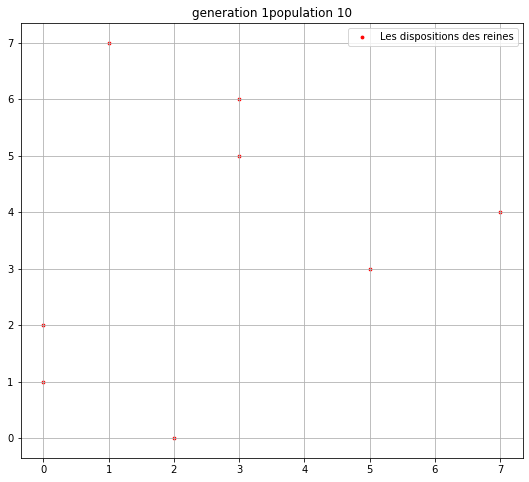

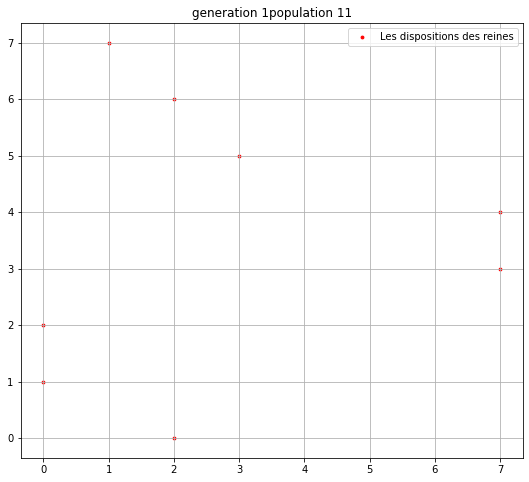

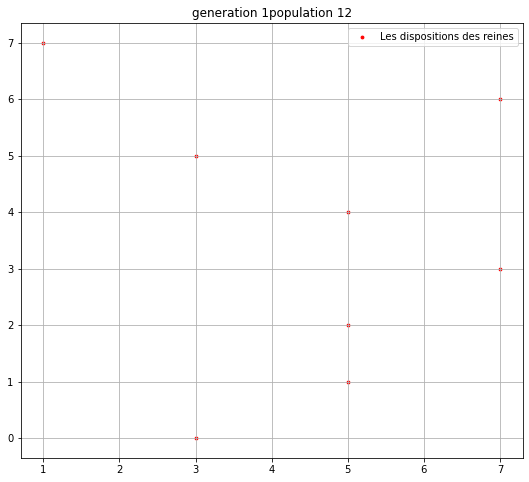

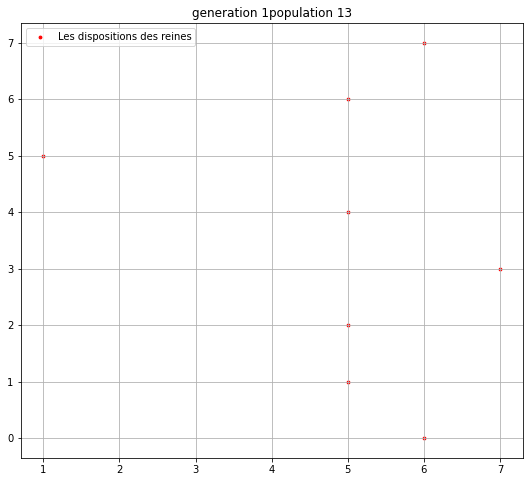

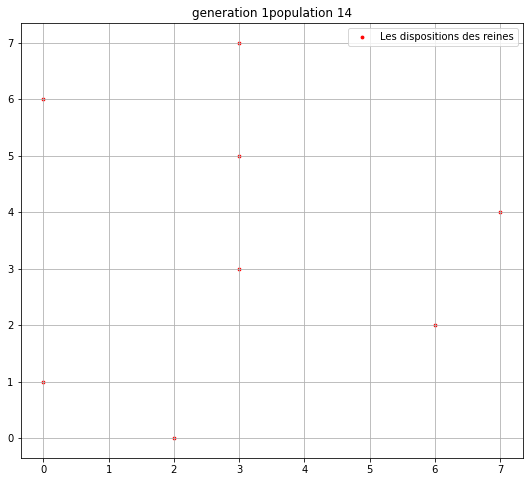

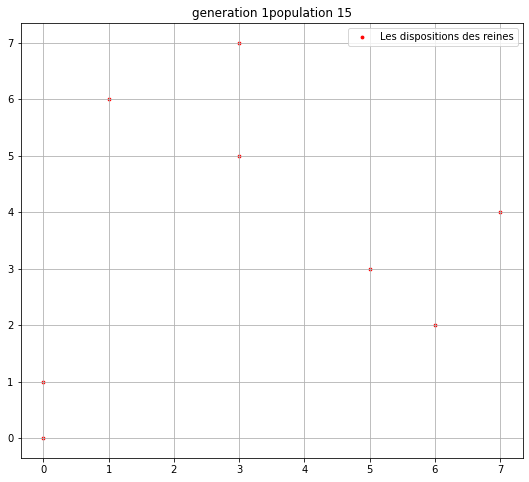

In [83]:
for k in range(len(generations[0][1])):#on boucle sur le nombre d'individus dans la premiere population
    affichage_position_des_reinnes(generations[0][1][k].tolist(),0,k)